# NN Classify 15 Fruits

![Fruit Example](../../../../images/nn-fruit-assignment/examplefruit.png)

# Data collection
The database used in this study is comprising of 44406 fruit images, which we collected
in a period of 6 months. The images where made with in our lab’s environment under different
scenarios which we mention below. We captured all the images on a clear background with
resolution of 320×258 pixels. We used HD Logitech web camera to took the pictures. During
collecting this database, we created all kind of challenges, which, we have to face in real-world
recognition scenarios in supermarket and fruit shops such as light, shadow, sunshine, pose
variation, to make our model robust for, it might be necessary to cope with illumination
variation, camera capturing artifacts, specular reflection shading and shadows. We tested our
model’s robustness in all scenarios and it perform quit well.
All of images were stored in RGB color-space at 8 bits per channel. The images were
gathered at various day times of the day and in different days for the same category. These
features increase the dataset variability and represent more realistic scenario. The Images had
large variation in quality and lighting. Illumination is one of those variations in imagery. In fact,
illumination can make two images of same fruit less similar than two images of different kind
of fruits. We were used our own intelligent weight machine and camera to captured all images.
The fruit dataset was collected under relatively unconstrained conditions. There are also images
with the room light on and room lights off, moved the camera and intelligent weight machine
near to the windows of our lab than open windows, closed windows, open window curtains,
closed curtains. For a real application in a supermarket, it might be necessary to cope with
illumination variation, camera capturing artifacts, specular reflection shading and shadows.
Below are the few conditions which we were considered during collected dataset.
- Pose Variations with different categories of fruits
- Variability on the number of elements of fruits
- Used HD camera with 5-megapixel snapshots
- Same color but different Category fruits images with illumination variation
- Cropping and partial occlusion
- Different color same category fruit images
- Different lighting conditions (e.g. fluorescent, natural light some of the fruits shops
- and supermarkets are without sunshine so it can easily affect the recognition system
- Six different kind of apple fruit images
- Three categories of mango fruit with specular reflecting shading and shadows
- Three categories of Kiwi fruit images
- Natural and artificial lighting effect on images
- Partial occlusion with hand



# Load and visualize the dataset

The database used in this study is comprising of 70549 fruit images, which were collected in a period of 6 months. The images where made with in a lab’s environment under different scenarios which we mention below. All the images were captured on a clear background with resolution of 320×258 pixels.

Type of fruits in the dataset:
- Apple
- Banana
- Carambola
- Guava
- Kiwi
- Mango
- Orange
- Peach
- Pear
- Persimmon
- Pitaya
- Plum
- Pomegranate
- Tomatoes
- muskmelon

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
import random
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import gc
import requests
import zipfile
from IPython.display import Markdown, display
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
    
np.random.seed(0) # Add random seed of training for reproducibility

def load_images_from_folder(folder,only_path = False, label = ""):
# Load the paths to the images in a directory
# or load the images
    if only_path == False:
        images = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
        return images
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path

In [6]:
datasets_url = "https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/deep-learning/nn/nn-classify-15-fruits.zip"

In [7]:
notebook_path = os.getcwd()

tmp_folder_path = os.path.join(notebook_path, "tmp")

if not os.path.exists(tmp_folder_path):
    os.makedirs(tmp_folder_path)

tmp_zip_path = os.path.join(tmp_folder_path,"zip-store")

if not os.path.exists(tmp_zip_path):
    os.makedirs(tmp_zip_path)
    
datasets_response = requests.get(datasets_url)

datasets_name = os.path.basename(datasets_url)

datasets_save_path = os.path.join(tmp_zip_path, datasets_name)

with open(datasets_save_path, "wb") as file:
    file.write(datasets_response.content)


KeyboardInterrupt: 

In [ ]:
zip_file_path = f"./tmp/zip-store/{datasets_name}"
extract_path = "./tmp/"

zip_ref = zipfile.ZipFile(zip_file_path, 'r')
zip_ref.extractall(extract_path)
zip_ref.close()

In [2]:
# Load the paths on the images
images = []
DATASET_PATH ="./tmp/"
for f in os.listdir(DATASET_PATH):
    if "png" in os.listdir(DATASET_PATH+f)[0]:
        images += load_images_from_folder(DATASET_PATH+f,True,label = f)
    else: 
        for d in os.listdir(DATASET_PATH+f):
            if os.path.isdir(os.path.join(DATASET_PATH+f, d)):  # Check if it is a directory
                images += load_images_from_folder(os.path.join(DATASET_PATH+f, d), True, label=f)            
# Create a dataframe with the paths and the label for each fruit
df = pd.DataFrame(images, columns = ["fruit", "path"])

# Shuffle the dataset
from sklearn.utils import shuffle
df = shuffle(df, random_state = 0)
df = df.reset_index(drop=True)

# Assign to each fruit a specific number
fruit_names = sorted(df.fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

# Visualize the resulting dataframe
df.head()

{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


fruit                                               path  label
0        Apple            ./tmp/Apple\Apple F\Apple F _0_2509.png      0
1        Apple                ./tmp/Apple\Apple D\applee14300.png      0
2         Kiwi  ./tmp/Kiwi\Total Number of Kiwi fruit\Kiwi0034...      4
3  Pomegranate             ./tmp/Pomegranate\Pomegranet002119.png     12
4        Guava       ./tmp/Guava\guava total final\Guava03019.png      3

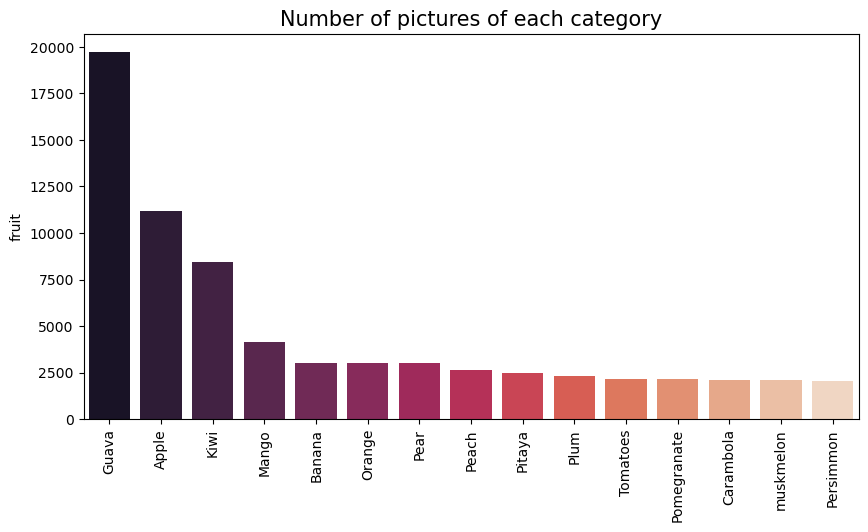

In [3]:
# Display the number of pictures of each category
vc = df["fruit"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

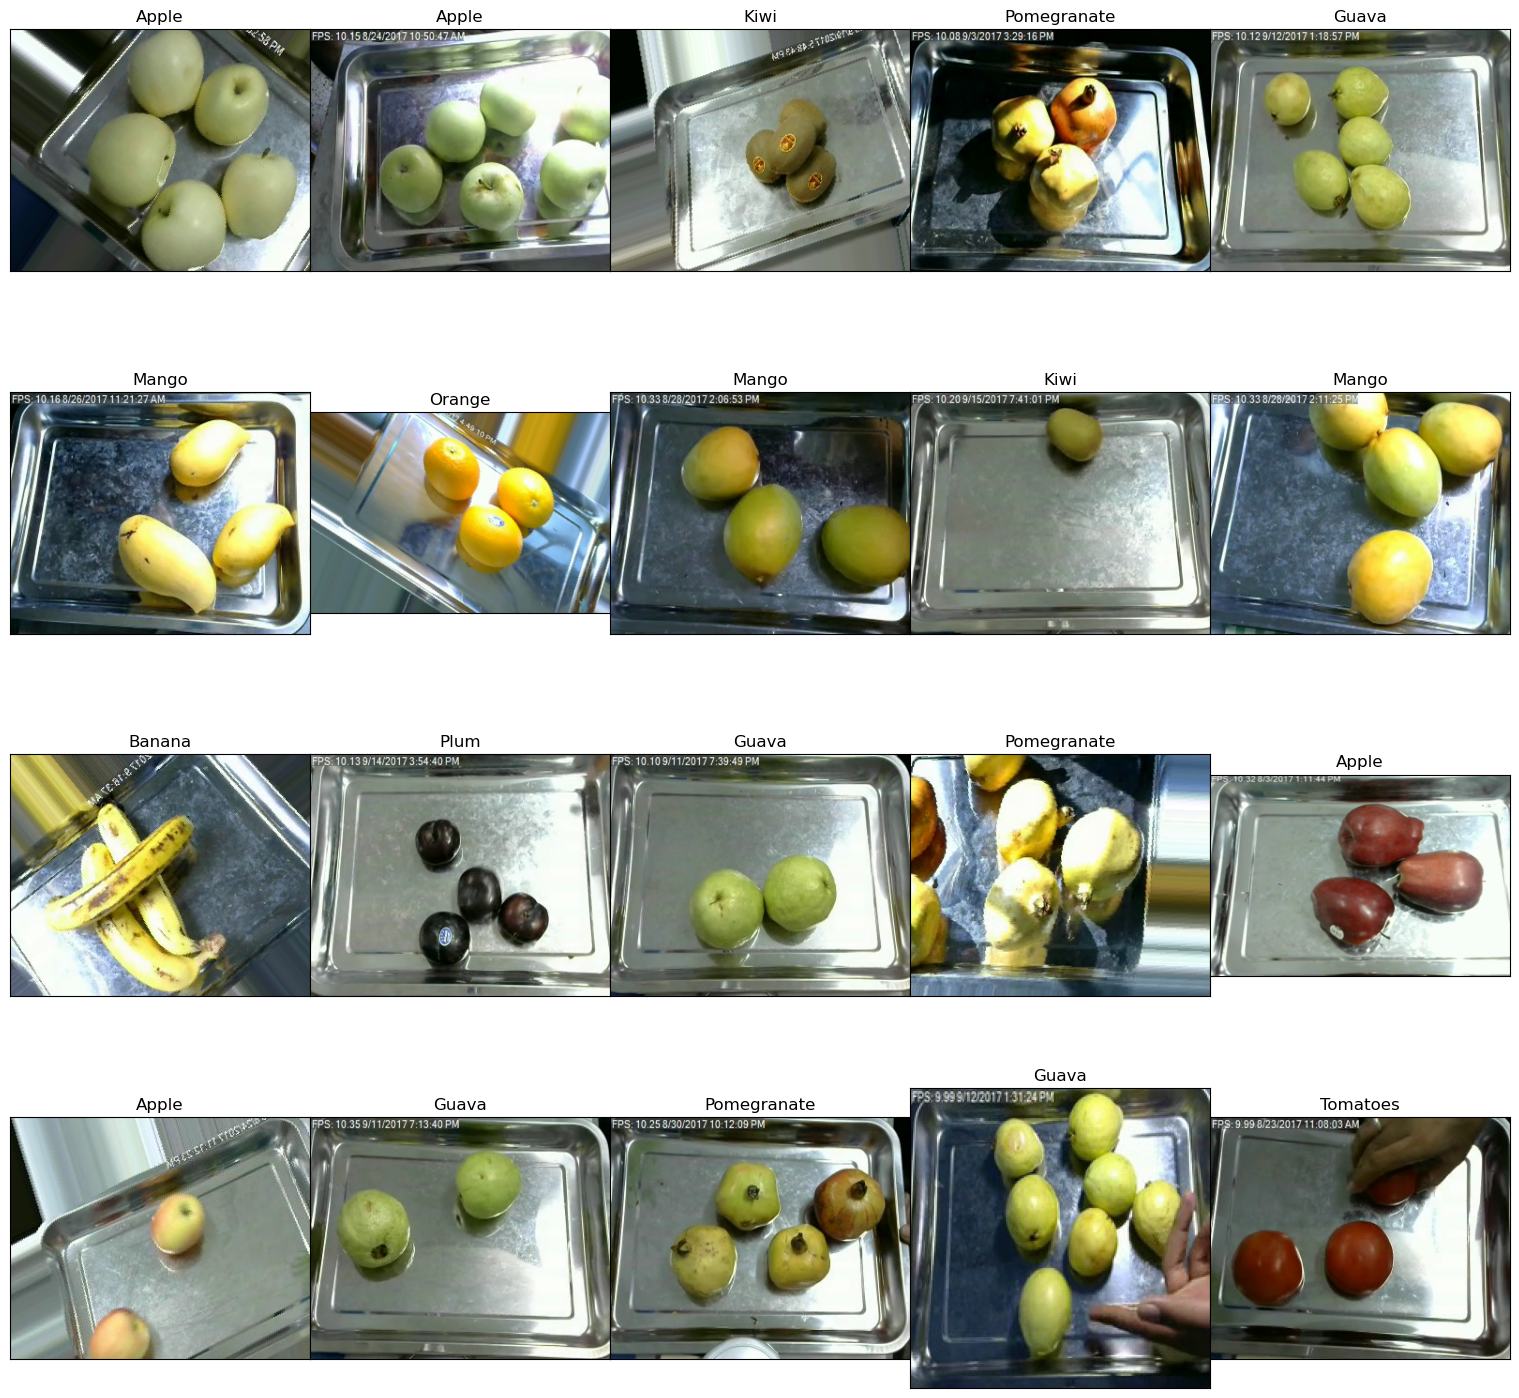

In [4]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.path[i]))
    ax.set_title(df.fruit[i], fontsize = 12)
plt.tight_layout(pad=0.0)
plt.show()

# Train the neural network from scratch with Keras and w/o generator

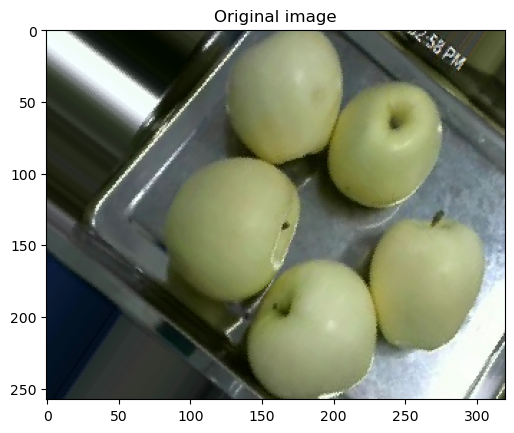

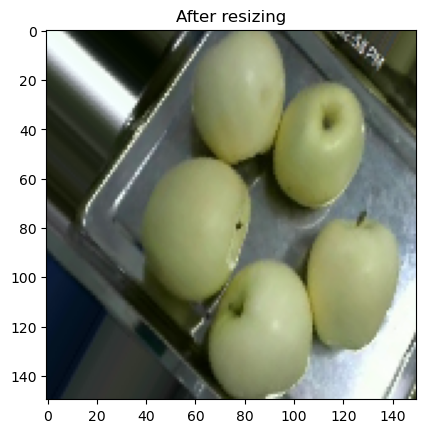

In [5]:
# The pictures will be resized to have the same size for the neural network
img = plt.imread(df.path[0])
plt.imshow(img)
plt.title("Original image")
plt.show()

plt.imshow(cv2.resize(img, (150,150)))
plt.title("After resizing")
plt.show()

## Create and train the NN Model

In [6]:
def cut_df(df, number_of_parts, part):
# Return a part of the dataframe
# For example, if a dataframe has 10 rows and we want to return a part of them
# if it is cut in two, it will return the first 5 rows or the last 5 rows depending the part wanted

# Args:
#     df (pandas.DataFrame): The dataframe to cut a part of
#     number_of_parts (int): In how many parts should the dataframe be cut
#     part (int): The part of the dataframe to return

    if part < 1:
        print("Error, the part should be at least 1")
    elif part > number_of_parts:
        print("Error, the part cannot be higher than the number_of_parts")
        
    number_imgs_each_part = int(df.shape[0]/number_of_parts)
    idx1 = (part-1) * number_imgs_each_part
    idx2 = part * number_imgs_each_part
    return df.iloc[idx1:idx2]

def load_img(df):
# Load the images using their contained in the dataframe df
# Return a list of images and a list with the labels of the images
    img_paths = df["path"].values
    img_labels = df["label"].values
    X = []
    y = []
    
    for i,path in enumerate(img_paths):
        img =  plt.imread(path)
        img = cv2.resize(img, (150,150))
        label = img_labels[i]
        X.append(img)
        y.append(label)
    return np.array(X),np.array(y)

In [7]:
# CNN model:
def create_model():
    shape_img = (150,150,3)
    
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=shape_img, activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(len(mapper_fruit_names)))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [8]:
# def create_model():
#     shape_img = (150,150,3)
    
#     model = Sequential()

#     model.add(Flatten(input_shape=shape_img))

#     model.add(Dense(256))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.5))

#     model.add(Dense(len(mapper_fruit_names)))
#     model.add(Activation('softmax'))

#     model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
#     return model

In [9]:
def from_categorical(lst):
    """
    Inverse of to_categorical
    Example: [[0,0,0,1,0], [1,0,0,0,0]] => [3,0]
    """
    
    lst = lst.tolist()
    lst2 = []
    for x in lst:
        lst2.append(x.index(max(x)))
    return lst2

def display_stats(y_test, pred):
# Display prediction statistics
    print(f"### Result of the predictions using {len(y_test)} test data ###\n")
    y_test_class = from_categorical(y_test)
    print("Classification Report:\n")
    print(classification_report(y_test_class, pred))
    print("\nConfusion Matrix:\n\n")
    print(confusion_matrix(y_test_class, pred))
    print("\n")
    printmd(f"# Accuracy: {round(accuracy_score(y_test_class, pred),5)}")
    
def plot_training(model):
    history = pd.DataFrame(model.history.history)
    history[["accuracy","val_accuracy"]].plot()
    plt.title("Training results")
    plt.xlabel("# epoch")
    plt.show()

In [10]:
model = create_model()
hists = []

# The model will be trained with one part of the data.
# There isn't enough RAM on Kaggle to handle all the data.
# In the next chapter a generator will be used
# to "feed" the ANN step by step.
# For Kaggle set divisor <= 5. 1/5 of the data will be used
divisor = 5

start_time = time.time()
X_train, y_train = load_img(cut_df(df,divisor,1))
y_train = to_categorical(y_train)

# If the ANN doesn't increase its prediction accuracy on the validation data after 
# 10 epochs, stop the training and take the best of the ANN.
callbacks = [EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

model.fit(X_train, y_train, batch_size=128, epochs=25, callbacks=callbacks, validation_split = 0.1, verbose = 1)
hists.append(model.history.history)


Epoch 1/25
100/100 [==============================] - 284s 3s/step - loss: 2.4209 - accuracy: 0.2712 - val_loss: 2.2243 - val_accuracy: 0.2736
Epoch 2/25
100/100 [==============================] - 268s 3s/step - loss: 2.0234 - accuracy: 0.3459 - val_loss: 1.7872 - val_accuracy: 0.3806
Epoch 3/25
100/100 [==============================] - 260s 3s/step - loss: 1.6419 - accuracy: 0.4413 - val_loss: 1.4012 - val_accuracy: 0.5592
Epoch 4/25
100/100 [==============================] - 285s 3s/step - loss: 1.1338 - accuracy: 0.6090 - val_loss: 0.8158 - val_accuracy: 0.6981
Epoch 5/25
100/100 [==============================] - 279s 3s/step - loss: 0.7463 - accuracy: 0.7262 - val_loss: 0.5055 - val_accuracy: 0.7888
Epoch 6/25
100/100 [==============================] - 273s 3s/step - loss: 0.9066 - accuracy: 0.7375 - val_loss: 0.9331 - val_accuracy: 0.7768
Epoch 7/25
100/100 [==============================] - 271s 3s/step - loss: 0.8982 - accuracy: 0.7090 - val_loss: 0.4987 - val_accuracy: 0.8030

In [18]:
# Run the garbage collector
gc.collect()

43965

In [19]:
time_model = time.time() - start_time
print(f"Time to train the model: {int(time_model)} seconds")

Time to train the model: 37254 seconds


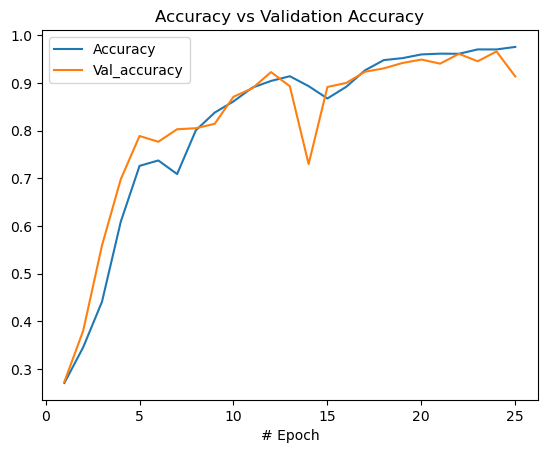

In [26]:
acc = []
val_acc = []
for i in range(len(hists)):
    acc += hists[i]["accuracy"]
    val_acc += hists[i]["val_accuracy"]
hist_df = pd.DataFrame({"# Epoch": [e for e in range(1,len(acc)+1)],"Accuracy": acc, "Val_accuracy": val_acc})
hist_df.plot(x = "# Epoch", y = ["Accuracy","Val_accuracy"])
plt.title("Accuracy vs Validation Accuracy")
plt.show()

## Predictions<a class="anchor" id="3"></a>

In [27]:
import warnings
warnings.filterwarnings("ignore")

# Make predictions with the model using the last 1/20 part of the dataset
X, y = load_img(cut_df(df, 20, 20))
pred = model.predict(X)
pred_classes = np.argmax(pred, axis=1)
y_test = to_categorical(y)

# Display statistics
display_stats(y_test, pred_classes)

111/111 [==============================] - 24s 216ms/step
### Result of the predictions using 3527 test data ###

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       573
           1       0.93      0.90      0.91       149
           2       1.00      0.99      1.00       107
           3       0.99      0.99      0.99      1022
           4       0.99      1.00      0.99       411
           5       0.96      0.95      0.95       183
           6       0.97      1.00      0.98       149
           7       0.95      0.93      0.94       148
           8       0.92      0.94      0.93       144
           9       1.00      0.95      0.98       111
          10       0.92      0.99      0.96        97
          11       1.00      1.00      1.00       119
          12       1.00      0.93      0.97       105
          13       0.99      0.99      0.99       117
          14       0.75      0.89      0.82        

# Accuracy: 0.96513

In [28]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import get_file

model_url = "https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/deep-learning/nn/best_model_cnn.h5"
model_path = get_file("best_model_cnn.h5", model_url)

model = load_model(model_path)

In [29]:
import warnings
warnings.filterwarnings("ignore")

# Make predictions with the model using the last 1/20 part of the dataset
X, y = load_img(cut_df(df, 20, 20))
pred = model.predict(X)
pred_classes = np.argmax(pred, axis=1)
y_test = to_categorical(y)

# Display statistics
display_stats(y_test, pred_classes)

111/111 [==============================] - 18s 157ms/step
### Result of the predictions using 3527 test data ###

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       573
           1       0.93      0.90      0.91       149
           2       1.00      0.99      1.00       107
           3       0.99      0.99      0.99      1022
           4       0.99      1.00      0.99       411
           5       0.96      0.95      0.95       183
           6       0.97      1.00      0.98       149
           7       0.95      0.93      0.94       148
           8       0.92      0.94      0.93       144
           9       1.00      0.95      0.98       111
          10       0.92      0.99      0.96        97
          11       1.00      1.00      1.00       119
          12       1.00      0.93      0.97       105
          13       0.99      0.99      0.99       117
          14       0.75      0.89      0.82        

# Accuracy: 0.96513

## Visualize the result with pictures of fruits

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


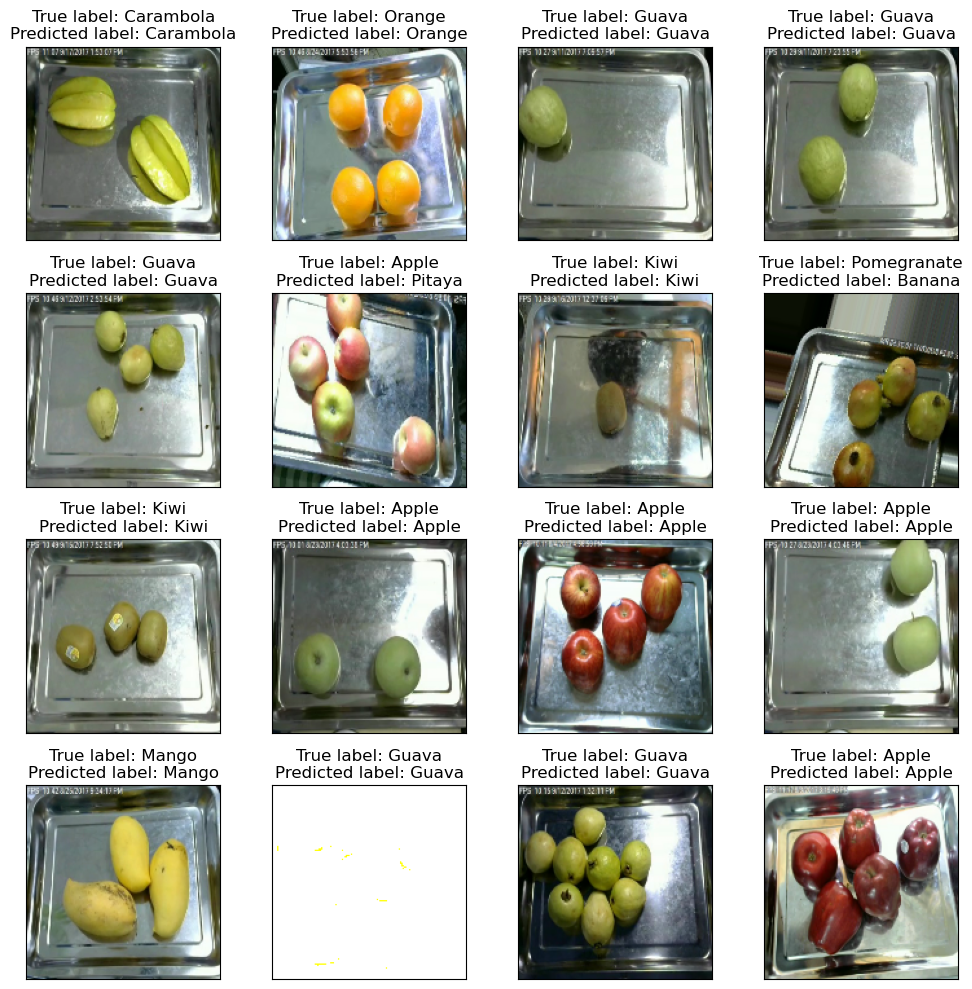

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X[-i])
    ax.set_title(f"True label: {fruit_names[y[-i]]}\nPredicted label: {fruit_names[int(pred_classes[-i])]}")

plt.tight_layout()
plt.show()

<!-- <strong>The predictions are very good with around 97% accuracy using only 1/5 of the dataset to train the model.</strong> -->

# Acknowledgments

Thanks to DATALIRA for creating the open-source course [ Classify 15 Fruits with TensorFlow ](https://www.kaggle.com/code/databeru/classify-15-fruits-with-tensorflow-acc-99-6). It inspires the majority of the content in this chapter.